### In this notebook, I am going to discuss the lepton jet reconstruction efficiency w.r.t various parameters such as dark Photon pt, lxy and eta. I start with the Lxy distribution of dark Photon for a lower bound state mass. Then I apply a Pt cut to that. 

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)


<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_4mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

Here I am considering 2 selections, one with all the sample, one with pt> 30 GeV cut applied.

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"2mu2e",
        "baseNoLj_highPtA",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Text(0.5, 1.0, 'baseNoLj_highPtA')

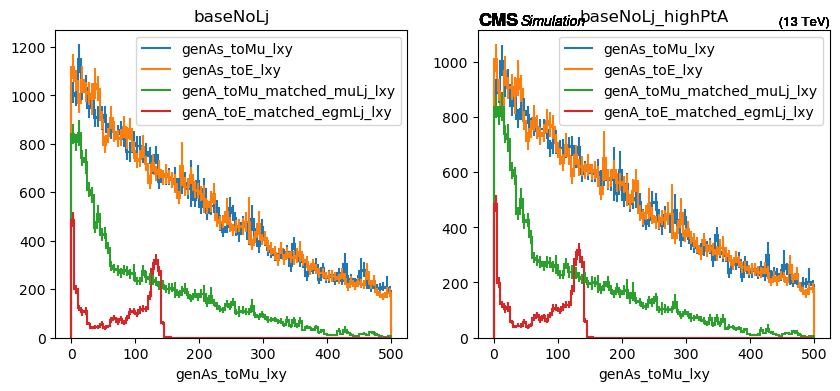

In [4]:
ch1 = "baseNoLj"
ch2 = "baseNoLj_highPtA"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
ax1.legend([
            "genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            "genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
ax2.legend(["genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            "genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])
ax1.set_title("baseNoLj")
ax2.set_title("baseNoLj_highPtA")


In the following plots, I show the efficiencies of the following for the above 2 selections<br>
1) dark Photon decaying to Muon with mulj nearby / dark photon decaying to muon. <br>
1) dark Photon decaying to electron with egmlj nearby / dark photon decaying to electron. <br>


Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

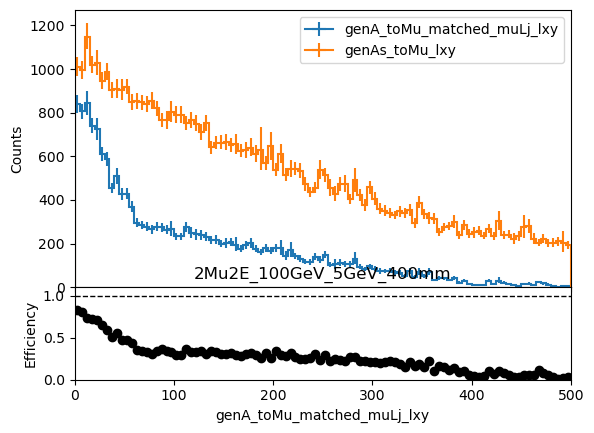

In [5]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

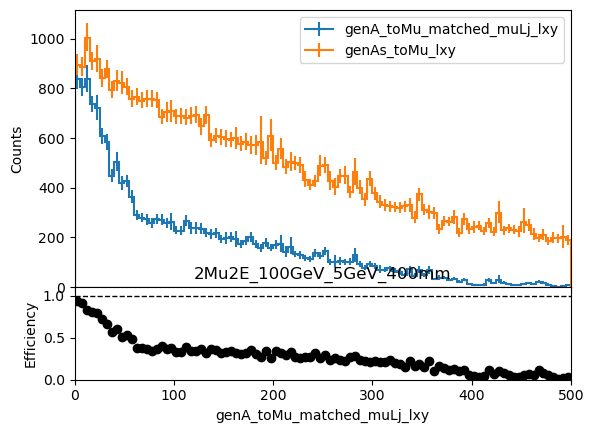

In [6]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toMu_lxy"][ch2,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

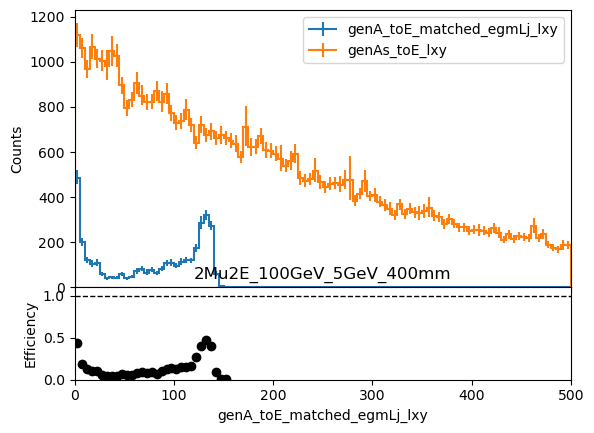

In [7]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm')

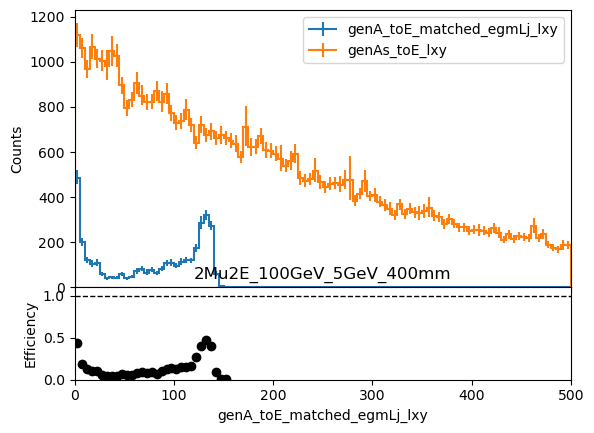

In [8]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm")

Observations made from the following: <br>
1) Efficiency increase for the dark photon decaying to muons. <br>
2) No variations for dark photons decaying to electron

### In the next section we are going to look at the Lxy distribution of the dark photon deacying to electron with egamma type lepton jet nearby by spilting them into eletron type and photon type.

In [9]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"2mu2e",
        "baseNoLj_eLj",
        "baseNoLj_gLj",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Text(0.5, 1.0, 'baseNolj_gLj')

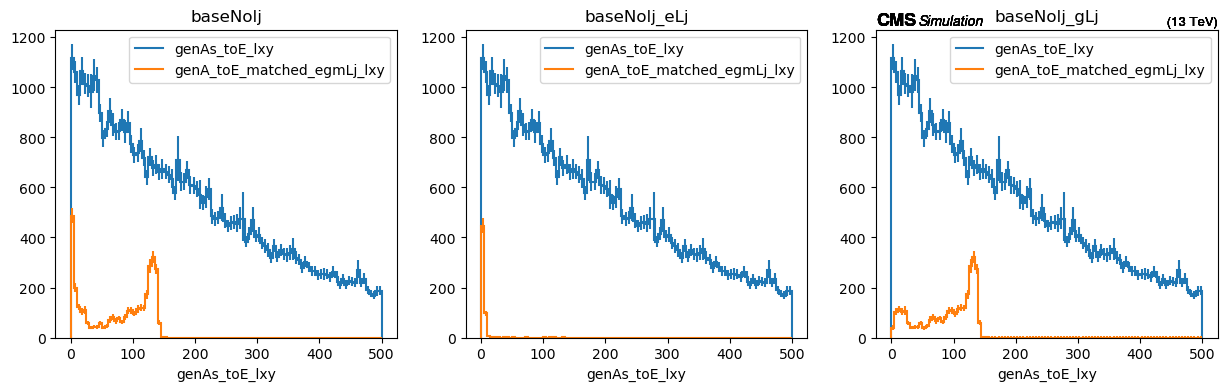

In [10]:
ch1 = "baseNoLj"
ch2 = "baseNoLj_eLj"
ch3 = "baseNoLj_gLj"
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))


utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:] for name in samples], density=False, ax=ax1)
ax1.legend([
            #"genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            #"genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])
#utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
#utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
ax2.legend([
            #"genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            #"genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])

#utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch3,:] for name in samples], density=False, ax=ax3)
#utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:] for name in samples], density=False, ax=ax2)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:] for name in samples], density=False, ax=ax3)
ax3.legend([
            #"genAs_toMu_lxy", 
            "genAs_toE_lxy", 
            #"genA_toMu_matched_muLj_lxy", 
            "genA_toE_matched_egmLj_lxy",
           ])
ax1.set_title("baseNolj")
ax2.set_title("baseNolj_eLj")
ax3.set_title("baseNolj_gLj")


Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm baseNoLj')

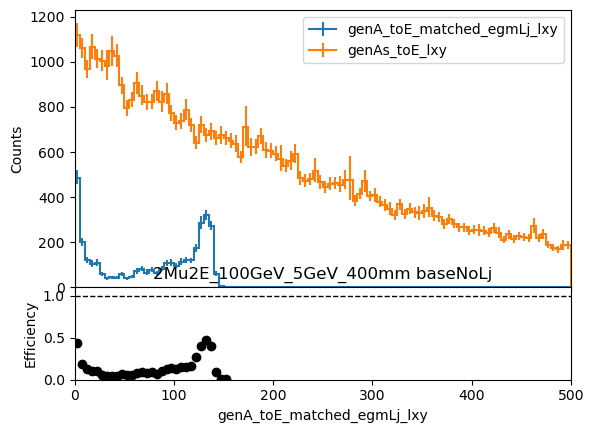

In [11]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm baseNoLj_eLj')

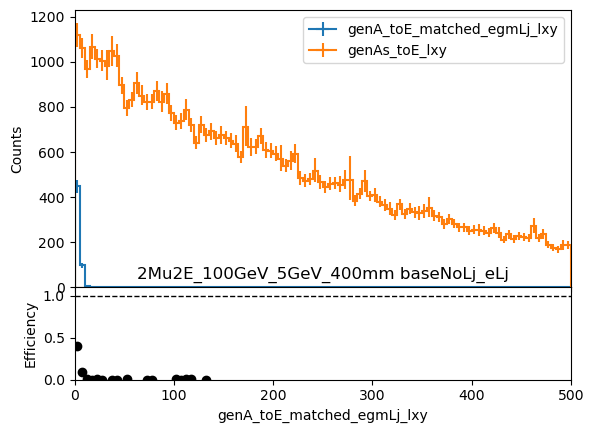

In [12]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch2,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm baseNoLj_eLj")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_400mm baseNoLj_gLj')

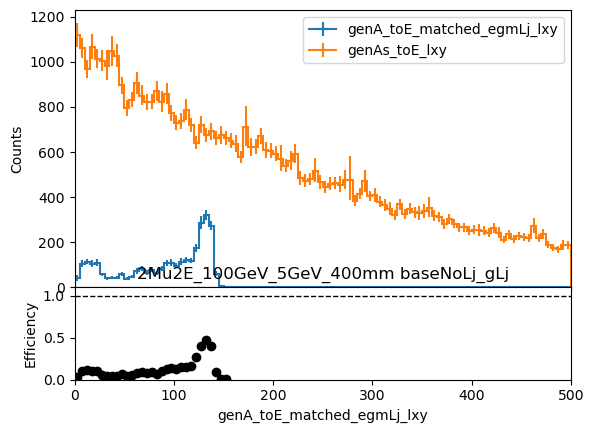

In [13]:
output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]["genAs_toE_lxy"][ch3,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_400mm baseNoLj_gLj")

We observe the following from the above plots:<br>
1)Most of the efficiency we see in the first plot is because of the reconstruction of photon type lj. <br>
2)The efficiency of the dark photon decaying to electron with e-type lepton jet nearby decreases as the Lxy increases. 
Also the value goes to zero as the lxy reaches 10 or 15 cm. <br>
3)The efficiency of the dark photon with photon type lepton jet increases as the lxy increases. 
Most of the efficiency we see in the first plot is coming from the photon type ljs. 
The valuses increases a little bit, the stay constant for a while, then increases again and goes to zero as the the lxy hits the electron calorimeter. 